In [21]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import importlib

%matplotlib ipympl
plt.rcParams['text.usetex'] = False
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

In [22]:
nH = 1e-9
fF = 1e-15
GHz = 1e9

In [35]:
h    = 6.626e-34
GHz = 1e9
e0   = 1.602e-19
Φ_0 = h/(2*e0)

In [137]:
# Circuit parameters
Csh = 15
C   = 100
CJ  = 3
Lq  = 25
Lr  = 10
Δ   = 0.1
EJ = 50
l = Lq*(Lq+4*Lr) - 4*Δ**2

In [138]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)

C_f = Cf * fF
L_f = Lf * nH
E_J = EJ * GHz

In [139]:
E_L_f = (Φ_0/(2*np.pi))**2/L_f / h
E_L_f / GHz

6.539994179227587

In [140]:
E_C_f = e0**2 / (2*C_f) / h
E_C_f / GHz

0.2847965234992276

In [141]:
ω01_res_lim = 1/np.sqrt(C_f*L_f) /2/np.pi/GHz
ω01_res_lim

3.860121869526092

In [147]:
EJ_values = np.geomspace(1e-2,100,50)
ω01_vs_EJ = np.zeros(len(EJ_values))
ω12_vs_EJ = np.zeros(len(EJ_values))
ω01_cR_lim_vs_EJ = np.zeros(len(EJ_values))
for i, EJ in enumerate(EJ_values):
    fluxonium_vs_EJ = sq_ext.sq_fluxonium( EJ=EJ , C_F_eff=Cf)  
    fluxonium_vs_EJ.diag(3) 
    ω01_vs_EJ[i] = fluxonium_vs_EJ.efreqs[1]-fluxonium_vs_EJ.efreqs[0]
    ω12_vs_EJ[i] = fluxonium_vs_EJ.efreqs[2]-fluxonium_vs_EJ.efreqs[1]
    L_f_CR = (Φ_0/2/np.pi)**2 / (EJ*GHz * h)
    ω01_cR_lim_vs_EJ[i]  = 1/np.sqrt(C_f*L_f_CR) /2/np.pi/GHz

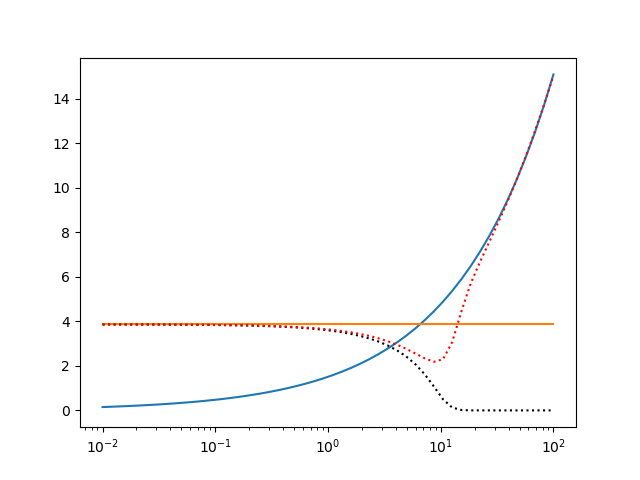

In [148]:
fig, ax = plt.subplots()
ax.plot(EJ_values, ω01_cR_lim_vs_EJ)
ax.plot(EJ_values, ω01_res_lim*np.ones(len(EJ_values)))
ax.plot(EJ_values, ω01_vs_EJ, ':k')
ax.plot(EJ_values, ω12_vs_EJ, ':r')

ax.set_xscale('log')
# ax.set_yscale('log')
fig.show()
plt.close('all')